In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Biscoe               NaN              NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  

In [4]:
df = df.dropna()
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df.species = le.fit_transform(df.species)
df = pd.get_dummies(df,columns =['island'])
df.sex = le.fit_transform(df.sex)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,2,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,39.3,20.6,190.0,3650.0,2,0,0,1


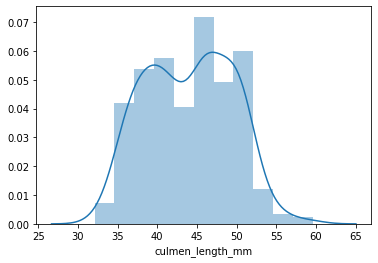

In [8]:
sns.distplot(df['culmen_length_mm'])

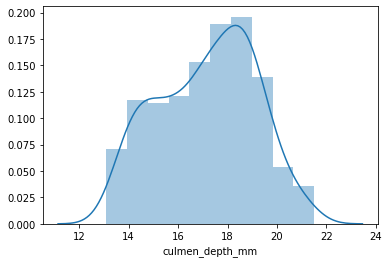

In [9]:
sns.distplot(df['culmen_depth_mm'])

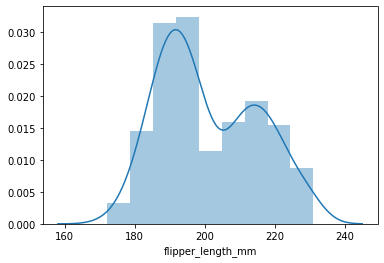

In [10]:
sns.distplot(df['flipper_length_mm'])

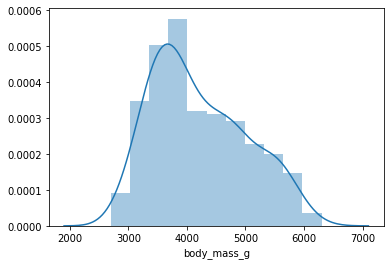

In [11]:
sns.distplot(df['body_mass_g'])

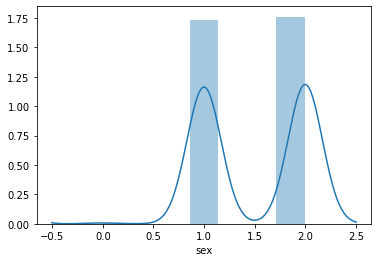

In [16]:
sns.distplot(df['sex'])

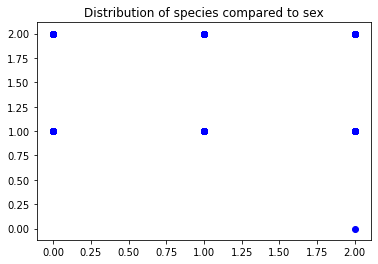

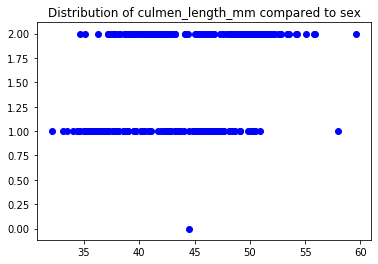

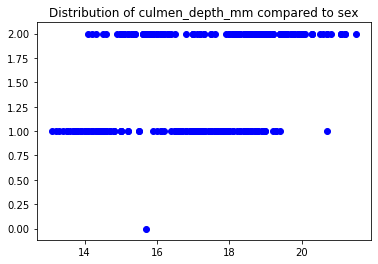

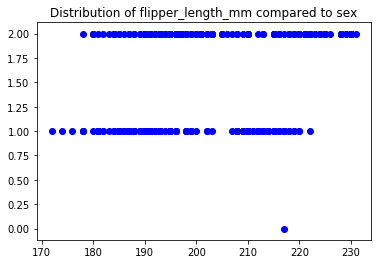

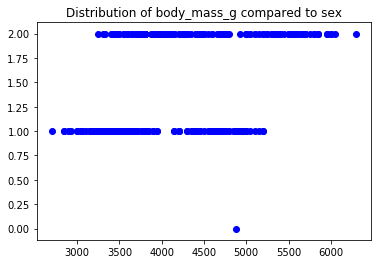

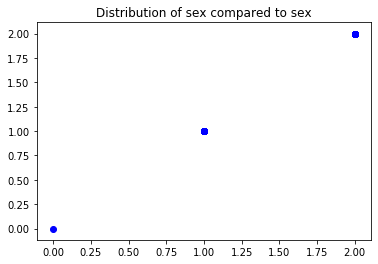

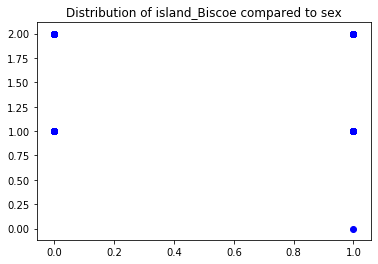

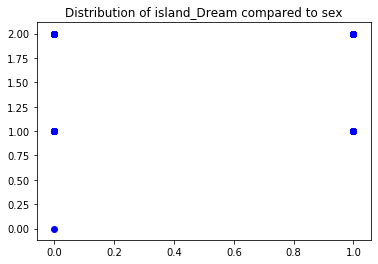

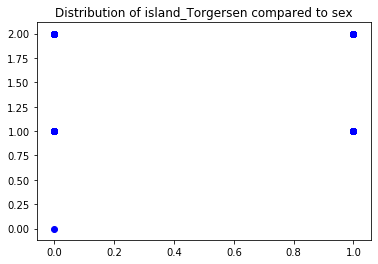

In [17]:
y = df['sex']
for col in df.columns:
    plt.title('Distribution of {} compared to sex'.format(col))
    plt.scatter(df[col], y, c ="blue")
    plt.show()

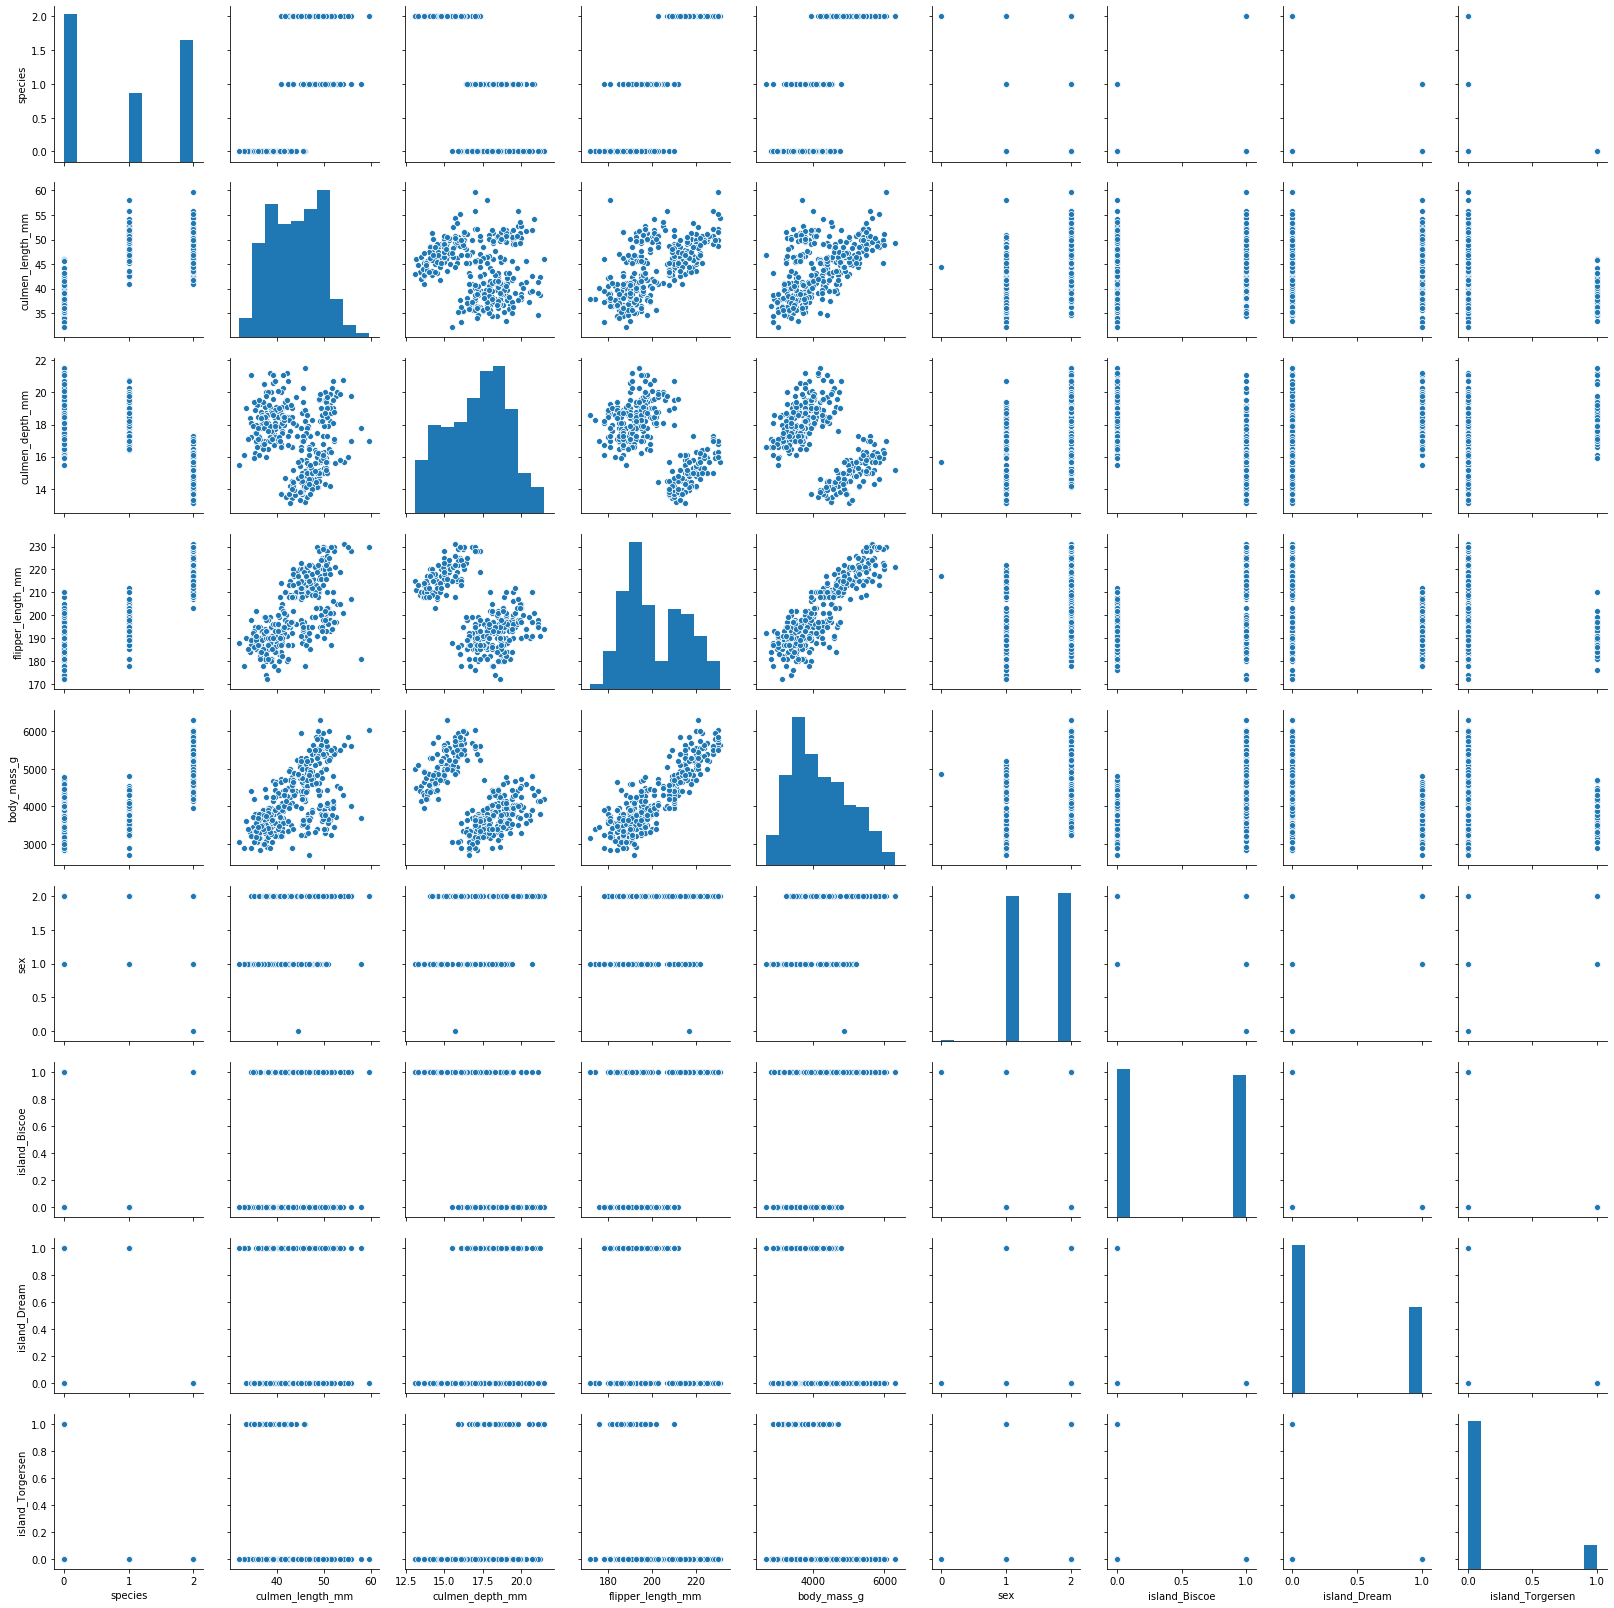

In [18]:
sns.pairplot(df)

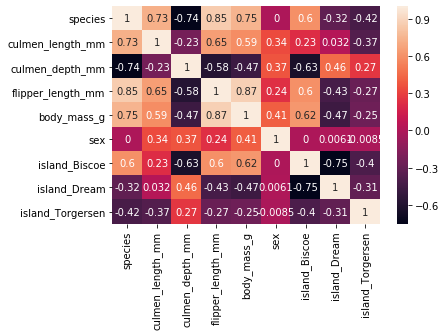

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [20]:
df.describe()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.922156,43.994311,17.160479,201.014970,4209.056886,1.500000,0.491018,0.368263,0.140719
std,0.890349,5.460521,1.967909,14.022175,804.836129,0.506712,0.500669,0.483057,0.348253
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,44.500000,17.300000,197.000000,4050.000000,2.000000,0.000000,0.000000,0.000000
75%,2.000000,48.575000,18.700000,213.000000,4793.750000,2.000000,1.000000,1.000000,0.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,2.000000,1.000000,1.000000,1.000000


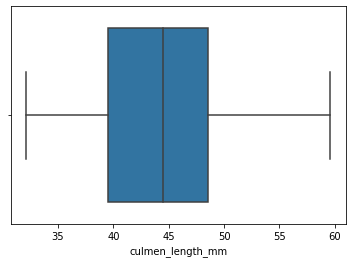

In [21]:
sns.boxplot(df.culmen_length_mm)

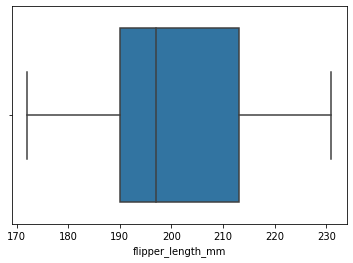

In [22]:
sns.boxplot(df.flipper_length_mm)

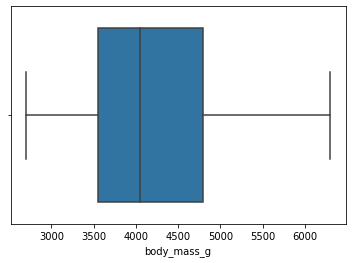

In [23]:
sns.boxplot(df.body_mass_g)

In [24]:
p99 = df.flipper_length_mm.quantile(0.99)
p99

230.0

In [25]:
df = df[df.flipper_length_mm<=p99]

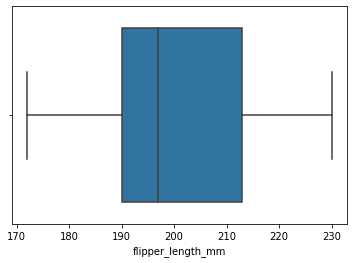

In [26]:
sns.boxplot(df.flipper_length_mm)

In [30]:
y = df['sex']
y

0      2
1      1
2      1
4      1
5      2
6      1
7      2
12     1
13     2
14     2
15     1
16     1
17     2
18     1
19     2
20     1
21     2
22     1
23     2
24     2
25     1
26     2
27     1
28     1
29     2
30     1
31     2
32     1
33     2
34     1
      ..
312    1
313    2
314    1
315    2
316    2
317    1
318    1
319    2
320    1
321    2
322    1
323    2
325    2
326    1
327    2
328    1
329    2
330    1
331    2
332    1
333    2
334    1
335    2
336    0
337    2
338    1
340    1
341    2
342    1
343    2
Name: sex, Length: 333, dtype: int32

In [31]:
X =df.drop(columns =['sex'],axis =1)
X.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1
2,0,40.3,18.0,195.0,3250.0,0,0,1
4,0,36.7,19.3,193.0,3450.0,0,0,1
5,0,39.3,20.6,190.0,3650.0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()